In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import PolynomialFeatures as PF

In [3]:
def mse(y,y_pred):
    return ((y - y_pred)**2).mean()

In [4]:
x = np.linspace(-2,2,100)

In [5]:
def f(x):
    return np.sin(x**3 + x**2)

In [6]:
data_x = x[::7]

In [7]:
data_y = f(data_x)

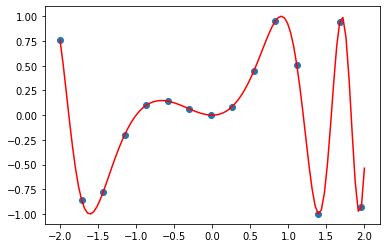

In [8]:
plt.scatter(data_x,data_y)
plt.plot(x,f(x),color='r')
plt.show()

# Train and test set

In [9]:
test_x = data_x[3::4].reshape(-1,1)

In [10]:
test_y = f(test_x)

In [11]:
a = np.arange(10)

In [12]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
a[[2,3,4]]

array([2, 3, 4])

In [14]:
a[[False,  True,  True,  True, False,  True,  True,  True, False, True]]

array([1, 2, 3, 5, 6, 7, 9])

In [15]:
filter = np.mod(np.arange(data_x.size),4)!=3

In [16]:
filter

array([ True,  True,  True, False,  True,  True,  True, False,  True,
        True,  True, False,  True,  True,  True])

In [17]:
train_x = data_x[filter].reshape(-1,1)

In [18]:
train_y = f(train_x)

In [19]:
x = x.reshape(-1,1)

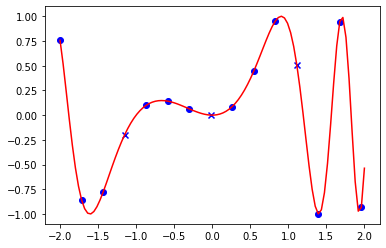

In [20]:
plt.scatter(test_x,test_y, marker='x', color='b')
plt.scatter(train_x,train_y, color='b')
plt.plot(x,f(x),color='r')
plt.show()

In [21]:
poly = PF(5)

In [22]:
poly.fit(train_x)

PolynomialFeatures(degree=5)

In [23]:
model = LR()

In [24]:
model.fit(poly.transform(train_x),train_y)

LinearRegression()

In [25]:
y_pred = model.predict(poly.transform(test_x))

In [26]:
test_loss = mse(test_y,y_pred) 

In [27]:
test_loss

0.1333601814978931

In [28]:
y_pred_2 = model.predict(poly.transform(train_x))

In [29]:
train_loss = mse(train_y,y_pred_2) 

In [30]:
train_loss

0.2715165781762308

## Example Train/test cycle with both loss

In [31]:
def experiment(d):
    
    poly = PF(d)
    poly.fit(train_x.reshape(-1, 1))
    model = LR()
    model.fit(poly.transform(train_x),train_y)
    y_pred_train = model.predict(poly.transform(train_x))
    y_pred_test = model.predict(poly.transform(test_x))
    
    # Target function
    plt.plot(x,f(x),color='r')
    # Train set
    plt.scatter(train_x,train_y, color='b')
    # Test set
    plt.scatter(test_x,test_y, marker='x', color='b')
    # Predicted function
    plt.plot(x,model.predict(poly.transform(x)),color='g')
    
    plt.ylim(-1,1)
    plt.show()
    print('Train loss:', mse(train_y,y_pred_train))
    print('Test loss:', mse(test_y,y_pred_test))

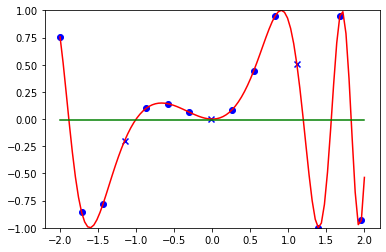

Train loss: 0.48462842272070156
Test loss: 0.10136808265047835


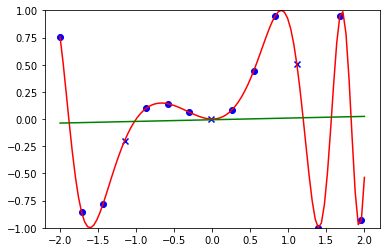

Train loss: 0.4842395702949296
Test loss: 0.09336024815950872


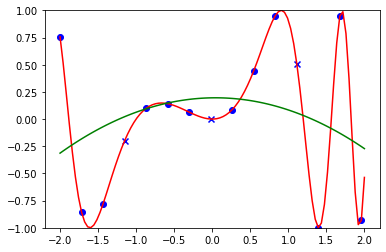

Train loss: 0.4547524549574904
Test loss: 0.09757534896875548


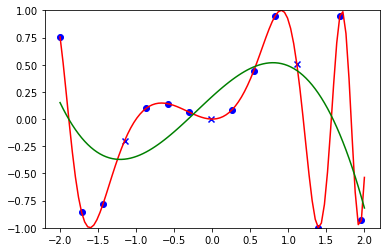

Train loss: 0.359284311336999
Test loss: 0.023539494686632686


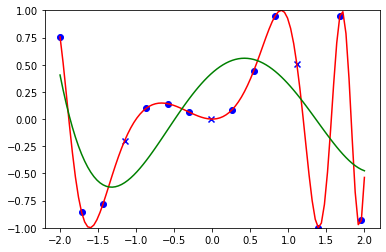

Train loss: 0.32550400466932844
Test loss: 0.13212778936677463


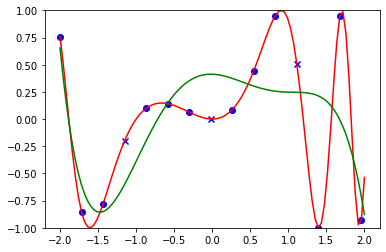

Train loss: 0.2715165781762308
Test loss: 0.1333601814978931


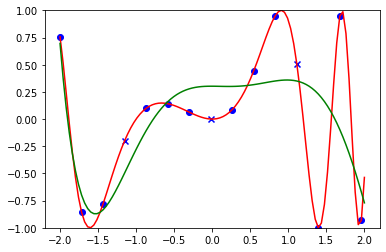

Train loss: 0.2673911202767684
Test loss: 0.06827533738625226


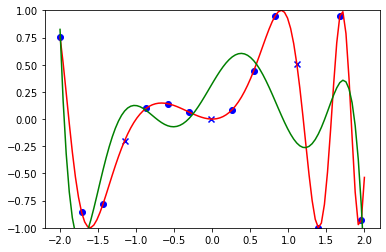

Train loss: 0.18469117321613412
Test loss: 0.23313788252229614


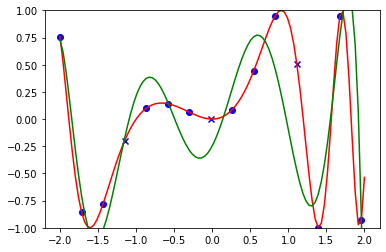

Train loss: 0.0655415883058205
Test loss: 0.34605008395679304


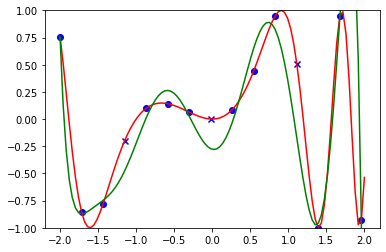

Train loss: 0.008456871123933172
Test loss: 0.2051756975044439


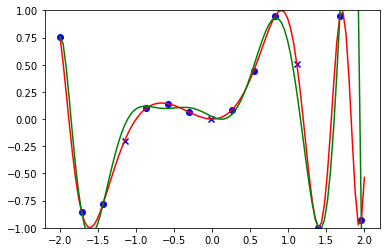

Train loss: 0.0006621265302689401
Test loss: 0.029706937061366793


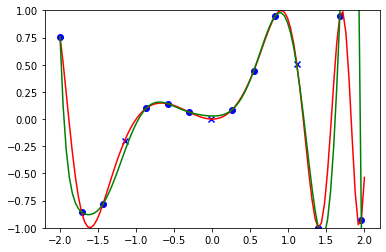

Train loss: 1.6903552973041418e-27
Test loss: 0.003734467724838351


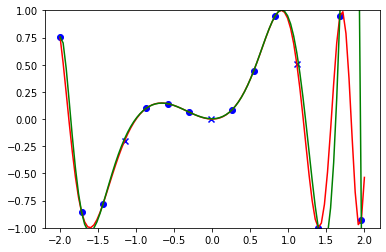

Train loss: 9.833881014732338e-27
Test loss: 0.003600220346628146


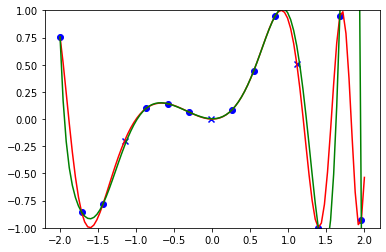

Train loss: 1.2123017208309037e-27
Test loss: 0.009608585486049226


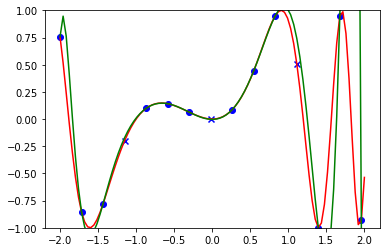

Train loss: 6.794993807414131e-28
Test loss: 0.018372611843197113


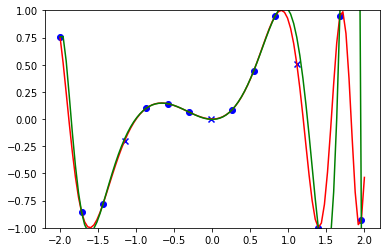

Train loss: 1.0915158848601077e-27
Test loss: 0.0197075848350968


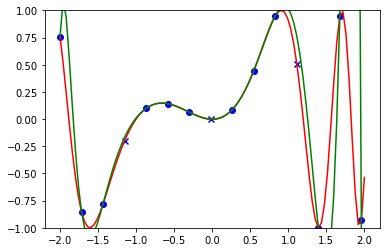

Train loss: 2.350672656540701e-27
Test loss: 0.02201827201530034


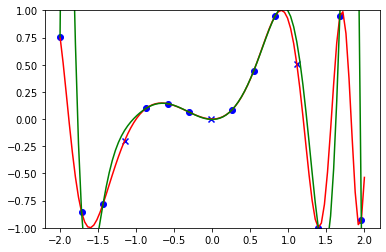

Train loss: 5.057877908469714e-26
Test loss: 0.016568996455181492


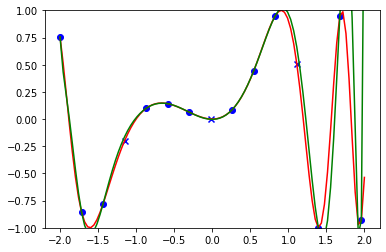

Train loss: 2.806378666337495e-24
Test loss: 0.008277702854683813


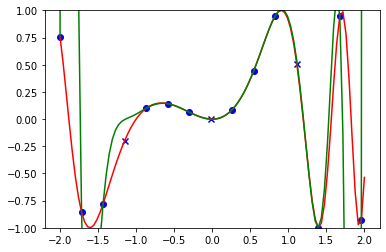

Train loss: 7.404319326453522e-25
Test loss: 0.012937336704345999


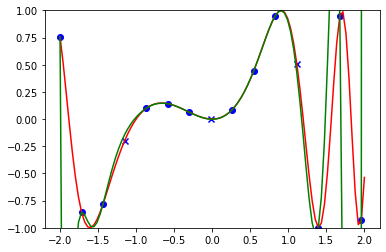

Train loss: 4.329005090856086e-24
Test loss: 0.00319714497854165


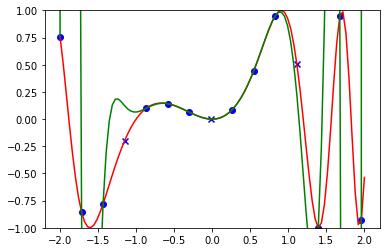

Train loss: 2.130782939583048e-24
Test loss: 0.06044489107185669


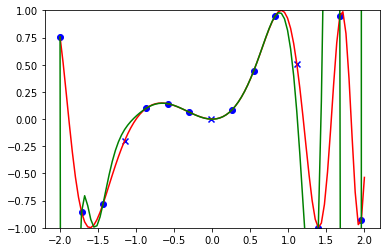

Train loss: 1.1134915134676623e-23
Test loss: 0.06758846961064637


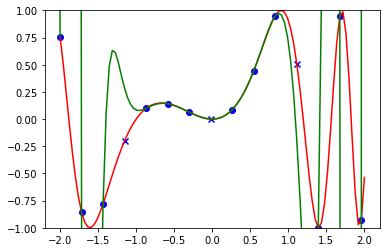

Train loss: 2.7102736378190283e-22
Test loss: 0.2419799457458877


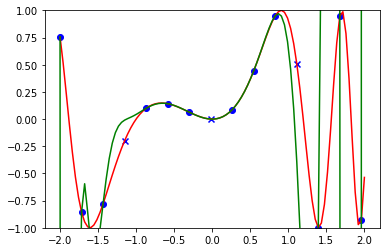

Train loss: 3.5189577510149424e-22
Test loss: 0.28288664087220555


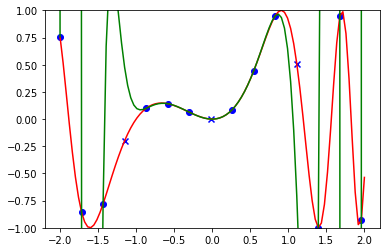

Train loss: 4.642264988199279e-22
Test loss: 0.6450699255627088


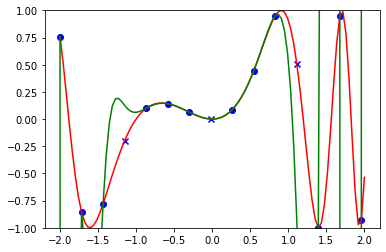

Train loss: 1.8903213670791825e-21
Test loss: 0.7240132442998545


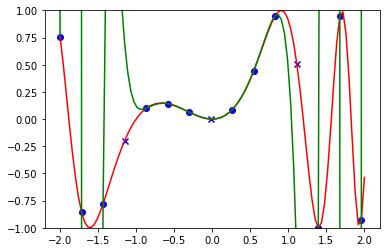

Train loss: 2.3717942421272828e-20
Test loss: 1.3293246042180678


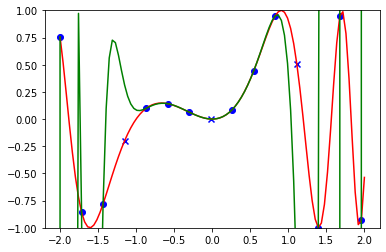

Train loss: 1.552300894021796e-20
Test loss: 1.4337919526088738


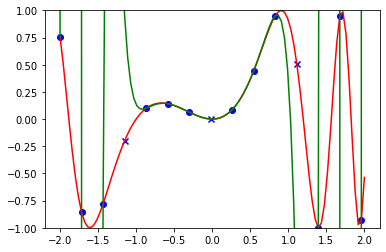

Train loss: 2.7260488106648896e-20
Test loss: 2.3070939139500686


In [32]:
for i in range(30):
    experiment(i)

In [33]:
def validation_curve():
    train_mse = []
    test_mse = []
    for d in range(30):
        poly = PF(d)
        poly.fit(train_x)
        model = LR()
        model.fit(poly.transform(train_x),train_y)
        y_pred_train = model.predict(poly.transform(train_x))
        y_pred_test = model.predict(poly.transform(test_x))
        train_mse.append(mse(train_y,y_pred_train))
        test_mse.append(mse(test_y,y_pred_test))
    my_x = np.arange(d+1)
    plt.plot(my_x,train_mse,label='train loss')
    plt.plot(my_x,test_mse,label='test loss')
    plt.ylim(0,1)
    plt.legend()

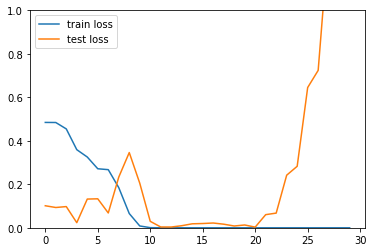

In [34]:
validation_curve()

In [35]:
def learning_curve(degree):
    
    train_mse = []
    test_mse = []
    
    x = np.linspace(-2,2,10000)
    np.random.shuffle(x)
    data_x = x[::7]
    data_y = f(data_x)
    filter = np.mod(np.arange(data_x.size),4)!=3
    train_x_pro = data_x[filter]
    train_y_pro = f(train_x_pro)
    test_x_pro = data_x[3::4]
    test_y_pro = f(test_x_pro)
    
    for d in range(100,2000,50):
        train_x = train_x_pro[:d]
        train_y = train_y_pro[:d]
        test_x = test_x_pro[:d]
        test_y = test_y_pro[:d]
        poly = PF(degree)
        poly.fit(train_x.reshape(-1, 1))
        model = LR()
        model.fit(poly.transform(train_x.reshape(-1, 1)),train_y)
        y_pred_train = model.predict(poly.transform(train_x.reshape(-1, 1)))
        y_pred_test = model.predict(poly.transform(test_x.reshape(-1, 1)))
        train_mse.append(mse(train_y,y_pred_train))
        test_mse.append(mse(test_y,y_pred_test))
    my_x = np.arange(len(train_mse))
    plt.plot(my_x,train_mse,label='train loss')
    plt.plot(my_x,test_mse,label='test loss',color='g')
    plt.legend()
    plt.show()

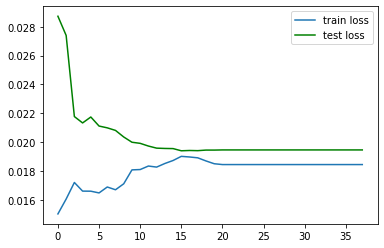

In [36]:
learning_curve(12)